In [13]:
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("raw_data.csv",
                     header=0)

There are 1963 admission records for stroke patients [icd9_code in ('430','431','434','433','436')]

In [3]:
df.shape

(1963, 24)

In [7]:
# Looking at the numbers of missing value in each column and column names
df.isnull().sum()

redays                  1715
lengthofstay               0
isdead                     0
next_admtime            1715
next_admtype            1715
row_id                     0
subject_id                 0
hadm_id                    0
admittime                  0
dischtime                  0
deathtime               1394
admission_type             0
admission_location         0
discharge_location         0
insurance                  0
language                 687
religion                  29
marital_status           173
ethnicity                  0
edregtime                206
edouttime                206
diagnosis                  0
hospital_expire_flag       0
has_chartevents_data       0
dtype: int64

### 30 days readmission for stoke admssions (Patients who died in admission were excluded.)
1. Within 1963 admissions, there are 233 cases that patients readmitted within 30 days, about 12% of total. 
2. 155 readmissions are unplanned within 233 total readmissions, about 66% of total.

In [8]:
q1 = """select 
        count(*),next_admtype from df where isdead = 0 and reDays <= 30 group by next_admtype
        """
ps.sqldf(q1, locals())

,count(*),next_admtype
0,78,ELECTIVE
1,155,EMERGENCY


### Mortality
Within 1963 admissions, there are 569 cases (about 30.5%) that patients died during admission. 

In [11]:
q2 = """select 
        count(*),hospital_expire_flag from df group by hospital_expire_flag
        """
ps.sqldf(q2, locals())

,count(*),hospital_expire_flag
0,1394,0
1,569,1


### Length of stay

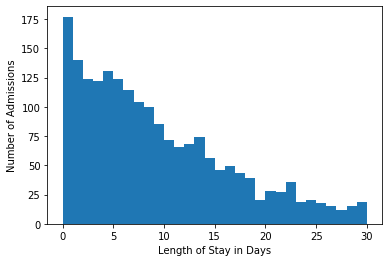

In [14]:
#Looking at the distribution of length of stay
plt.hist(df.lengthofstay, bins = 30)
plt.xlabel('Length of Stay in Days')
plt.ylabel('Number of Admissions')
plt.show()